[Title](encabezado_EDA.pptx)

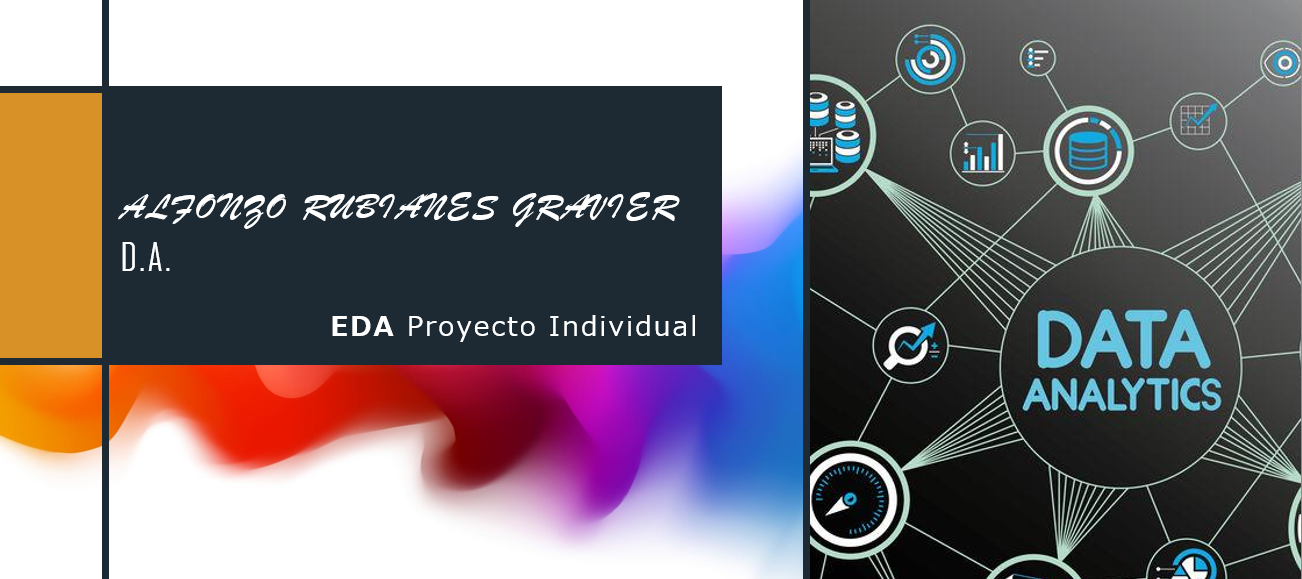

# El análisis exploratorio de datos (EDA) es un proceso utilizado por los científicos de datos para analizar y resumir conjuntos de datos. El objetivo principal del EDA es consultar los datos antes de hacer cualquier suposición. Permite identificar errores obvios, así como comprender mejor los patrones en los datos, detectar valores atípicos o sucesos anómalos y encontrar relaciones interesantes entre las variables.

# En pocas palabras, el EDA nos permitira conocer las fortalezas y vulnerabilidades del dataset con el que estamos trabajando

# Estructura del presente EDA:
1- Obtencion, Transformacion y Normalizacion de datos.
2- Visualizacion de datos.
3- Definicion del modelo predictivo.

# 1 - Obtencion, Transformacion y Normalizacion de datos.

Los datos fueron extraidos de los dastaset movies.csv y credicts.csv. 
Luego fueron transformar y normalizar mediante los procesos que se podran seguir en los archivos mvp.1transform.ipynb y mvp.2transform.ipynb, accesibles en el mismo repositorio donde se aloja el presente.

# 2 - Visualizacon de datos.

A continuacion, a partir de datasets mas pequeños oportunamente creados para las funciones solicitadas en las consignas (las que se pueden encontrar en el archivo mvp.funciones.ipynb), procedo a visualizar las variables mas importantes del dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import circlify


In [3]:
eda_productoras = pd.read_csv('productoras.csv')

In [4]:
eda_productoras.info()
eda_productoras.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9154 entries, 0 to 9153
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       9154 non-null   int64  
 1   titulo_original  9154 non-null   object 
 2   compañia         8535 non-null   object 
 3   recaudacion      9154 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 286.2+ KB


,Unnamed: 0,titulo_original,compañia,recaudacion
0,0,Toy Story,Pixar Animation Studios,373554033.0
1,3,Grumpier Old Men,Warner Bros.,0.0
2,4,Grumpier Old Men,Lancaster Gate,0.0
3,7,Father of the Bride Part II,Sandollar Productions,76578911.0
4,8,Father of the Bride Part II,Touchstone Pictures,76578911.0


# Al interntar armar una nuve de palabras de las compañias, resulta que muchos de los registros no son str, por lo que es necesario convertirlos a este formado debido a que WordCloud solo admite cadenas de texto como entrada. Para ello se agrega la segunda linea de codigo de las dos siguientes:

In [5]:
compañias = eda_productoras['compañia'].tolist()
compañias_str = "".join(map(str, compañias))

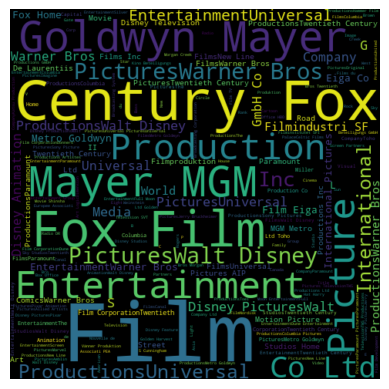

In [6]:
# Ahora que tengo un cadena de texto como entrada, genero la nube de palabras
wordcloud_compañias = WordCloud(width=480, height=480, margin=0).generate(compañias_str)
plt.imshow(wordcloud_compañias, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

## De este grafico se puede observar una debilidad importante en el dataset:
Esta radica en que se observan distintas formas de llamar a una misma compañia, por ejemplo 'CenturyFox', 'Fox Film', 'Meyer', 'MGM', 'Goldwyn Meyer', etc.

# Grafico un ranking de directores a partir de los pelicula_id; es decir a partir de la cantidad de peliculas hechas.

In [7]:
eda_directores =pd.read_csv('directores.csv')
eda_directores.head()

,Unnamed: 0,pelicula_id,puesto,crew_nombre,presupuesto,recaudacion
0,0,862,Director,John Lasseter,30000000.0,373554033.0
1,1,862,Screenplay,Joss Whedon,30000000.0,373554033.0
2,2,862,Screenplay,Andrew Stanton,30000000.0,373554033.0
3,3,862,Screenplay,Joel Cohen,30000000.0,373554033.0
4,4,862,Screenplay,Alec Sokolow,30000000.0,373554033.0


In [8]:
eda_directores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34344083 entries, 0 to 34344082
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Unnamed: 0   int64  
 1   pelicula_id  int64  
 2   puesto       object 
 3   crew_nombre  object 
 4   presupuesto  float64
 5   recaudacion  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.5+ GB


In [9]:
nombres = eda_directores.loc[eda_directores['puesto'] == 'Director', ['pelicula_id', 'crew_nombre']]


In [10]:
nombres.head()

,pelicula_id,crew_nombre
0,862,John Lasseter
106,862,John Lasseter
212,862,John Lasseter
318,862,John Lasseter
424,862,John Lasseter


In [11]:
eda_ranking_dir = nombres.groupby('crew_nombre')['pelicula_id'].count().reset_index()
eda_ranking_dir.columns = ['directores', 'cantidad_peliculas']
eda_ranking_dir = eda_ranking_dir.sort_values(by='cantidad_peliculas', ascending=False)
eda_ranking_dir.head()


,directores,cantidad_peliculas
1441,Lars von Trier,47303
1251,Jon M. Chu,14585
383,Christopher Nolan,11956
1855,Paul Greengrass,9460
984,J.J. Abrams,7728


In [ ]:

circles = circlify.circlify(
    eda_ranking_dir['cantidad_peliculas'].tolist(), 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1))

# Crear solo una figure y solo un subplot
fig, ax = plt.subplots(figsize=(10,10))

# Titulo
ax.set_title('Ranking de Directores')

# Remover axes
ax.axis('off')

# Determinar limites para los axis
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in cirles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# lista de niveles
directores = eda_ranking_dir['directores']

# print circulos
for circle, directores in zip(circles, directores):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.2, linewidth=2))
    plt.annotate(
          directores, 
          (x,y ) ,
          va='center',
          ha='center'
     )

# Aque tambien podemos observar otra devilidad del dataset.
Sl igual con en el caso de las Compañias, tambien se nombran de distintas maneras a un mismo director. Por ejemplo: 'Nolan Christopher', 'Chistopher Nolan'. Ello implica importantes limitaciones al momento del analisis.

## COMO OTRA ALTERNATIVA PARA GRAFICAR DIRECTORES, AUNQUE AQUI SE ESTARIA REPITIENDO EL GRAFICO QUE CON COMPAÑIAS. NO DA!

In [ ]:
#wordcloud = WordCloud(width=480, height=480, margin=0).generate(nombres_str)

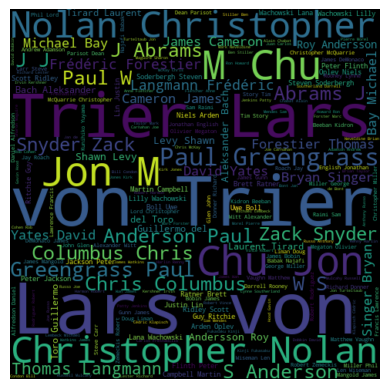

In [ ]:
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis("off")
#plt.margins(x=0, y=0)
#plt.show()

# Vamos a analisar la variable pais.

In [ ]:
eda_paises = pd.read_csv('paises.csv')
eda_paises.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5506 entries, 0 to 5505
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       5506 non-null   int64 
 1   titulo_original  5506 non-null   object
 2   pais             5262 non-null   object
dtypes: int64(1), object(2)
memory usage: 129.2+ KB


In [ ]:
peliculas_por_pais = eda_paises.groupby('pais')['titulo_original'].count().reset_index(name='cantidad_peliculas')
peliculas_por_pais.head()

,pais,cantidad_peliculas
0,Afghanistan,1
1,Argentina,5
2,Australia,53
3,Austria,16
4,Bahamas,1


In [ ]:
peliculas_por_pais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   pais                69 non-null     object
 1   cantidad_peliculas  69 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


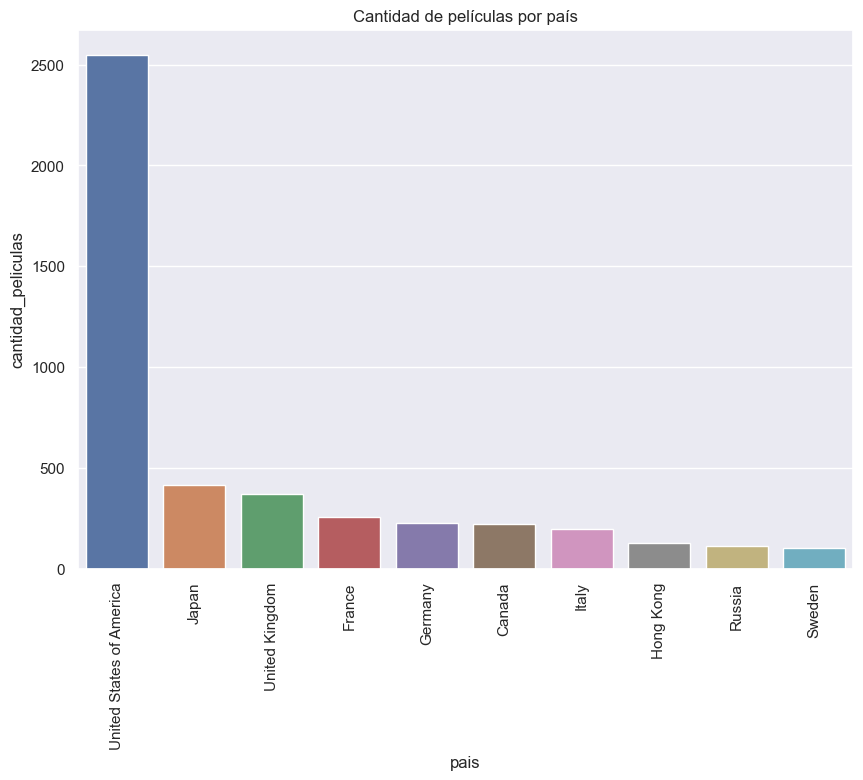

In [ ]:
# definimos estilo de plot
sns.set(style="darkgrid")

# cargamos el dataset
#df = ...

# seleccionamos los 10 países con más cantidad de películas
df = peliculas_por_pais.nlargest(10, 'cantidad_peliculas')

# definimos tamaño
plt.figure(figsize=(10, 7))

# creamos el gráfico
ax = sns.barplot(x='pais', y='cantidad_peliculas', data=df)

# añadimos título
plt.title('Cantidad de películas por país')

# rotamos las etiquetas del eje x
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# mostramos el gráfico
plt.show()


## Aqui observamos una evidente relevancia de los Estados Unidos de America por sobre los demas paises en la produccion de peliculas.
Esto no es un outlier ya que en la industria cinematografica es sabida esta predominancia. Y ello nos llevara a deducir que entre los datos de idioma_original, el ingles sera, asi tambien, el mas predominante.

In [ ]:
! py -m pip install uvicorn


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip
